Saving BTC_USD_2021-02-03_2022-02-02-CoinDesk.csv to BTC_USD_2021-02-03_2022-02-02-CoinDesk (4).csv
3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
2.8.0
Epoch 1/200
250/250 - 4s - loss: 6658.2783 - mae: 6658.2783 - val_loss: 2202.8623 - val_mae: 2202.8623 - 4s/epoch - 15ms/step
Epoch 2/200
250/250 - 2s - loss: 2693.8835 - mae: 2693.8835 - val_loss: 3292.7563 - val_mae: 3292.7563 - 2s/epoch - 9ms/step
Epoch 3/200
250/250 - 2s - loss: 2958.1067 - mae: 2958.1067 - val_loss: 2857.9343 - val_mae: 2857.9343 - 2s/epoch - 9ms/step
Epoch 4/200
250/250 - 2s - loss: 2795.2202 - mae: 2795.2202 - val_loss: 2302.1702 - val_mae: 2302.1702 - 2s/epoch - 9ms/step
Epoch 5/200
250/250 - 3s - loss: 2845.7285 - mae: 2845.7285 - val_loss: 2879.6934 - val_mae: 2879.6934 - 3s/epoch - 11ms/step
Epoch 6/200
250/250 - 2s - loss: 2841.3008 - mae: 2841.3008 - val_loss: 2526.4341 - val_mae: 2526.4341 - 2s/epoch - 10ms/step
Epoch 7/200
250/250 - 2s - loss: 2902.0398 - mae: 2902.0398 - val_loss: 2460.0974 - val_

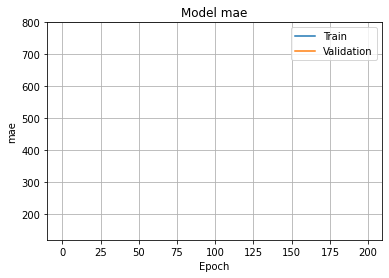

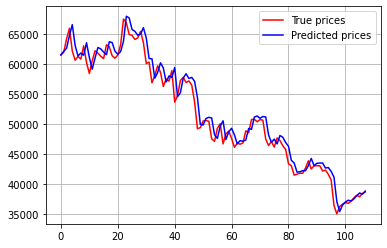

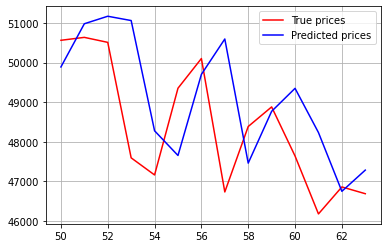

In [8]:
# -*- coding: utf-8 -*-
"""과제6 Bitcoin prediction

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/13JTL-Gl3aoh8zBX8y5s1RPATm2zad0gD
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("BTC_USD_2021-02-03_2022-02-02-CoinDesk.csv","r")

coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y=seq2dataset(seq,w,h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

import sys
import tensorflow
print(sys.version)
print(tensorflow.__version__)

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()